In [21]:
import geopandas
import seaborn
#import contextily
import matplotlib.pyplot as plt
import pandas
import numpy as np

## Pandas Tutorial Exercises

In [22]:
data = pandas.read_csv('data/CAINC1__ALL_STATES_1969_2017.csv', encoding='latin-1', 
                      skipfooter=3, engine='python')

In [23]:
small = data[data.LineCode.isin( [2, 3] )]

In [24]:
for year in range(1969, 2018):
    small = small[small[str(year)] != "(NA)"] #drop all records with NA

In [25]:
convert_dict = dict([(str(year), int) for year in range (1969, 2018)])

In [26]:
small = small.astype(convert_dict)

In [27]:
pc_inc = small[small.LineCode==3]

### Exercise 1

Identify the area with the lowest per-capita income each year.

In [28]:
for i in range(2017-1968):
    year = 1969 + i
    val = pc_inc[str(year)].min()
    pc_inc[pc_inc[str(year)] == val]
    print(year, val,  pc_inc[pc_inc[str(year)] == val]["GeoName"].item())

1969 1166 Loving, TX
1970 1381 Starr, TX
1971 1497 Dimmit, TX
1972 1702 Zavala, TX
1973 1971 Dimmit, TX
1974 2067 Starr, TX
1975 2215 Starr, TX
1976 2326 Starr, TX
1977 2355 Starr, TX
1978 2654 Starr, TX
1979 2928 Haskell, KS
1980 2510 Slope, ND
1981 3898 Starr, TX
1982 4301 Starr, TX
1983 4347 Starr, TX
1984 4396 Starr, TX
1985 4022 Petroleum, MT
1986 4444 Starr, TX
1987 4362 Starr, TX
1988 4768 Starr, TX
1989 5016 Starr, TX
1990 5723 Starr, TX
1991 6329 Starr, TX
1992 7096 Starr, TX
1993 7454 Starr, TX
1994 7730 Starr, TX
1995 7561 Loup, NE
1996 4979 Arthur, NE
1997 7108 Loup, NE
1998 8331 Loup, NE
1999 9350 Loup, NE
2000 10257 Starr, TX
2001 12442 Starr, TX
2002 12810 Buffalo, SD
2003 14280 Starr, TX
2004 14478 Starr, TX
2005 15418 Madison, ID
2006 11610 Ziebach, SD
2007 14405 Ziebach, SD
2008 14756 Wheeler, GA
2009 14615 Wheeler, GA
2010 15032 Wheeler, GA
2011 16045 Wheeler, GA
2012 17270 Wheeler, GA
2013 17564 Telfair, GA
2014 14165 Issaquena, MS
2015 13239 Issaquena, MS
2016 1781

### Exercise 2

As a percentage of the minimum per-captia income, calculate the relative income gap between the extremes of the income distribution each year.
    
Identify the year with the maximum relative income gap.

In [29]:
relative_gap = []
for i in range(2017-1968):
    year = 1969 + i
    val = pc_inc[str(year)].min()
    val_max = pc_inc[str(year)].max()
    rel_gap = val_max/val * 100
    relative_gap.append(rel_gap)
max_gap = max(relative_gap)

for i in range(len(relative_gap)):
    if (relative_gap[i] ==max_gap ):
        print(i + 1969)

2017


## Visualization Exercise

In [30]:
db = geopandas.read_file('data/texas.shp')
db.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,"POLYGON ((-100.00687 36.49388, -100.00114 36.4..."
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,"POLYGON ((-102.16757 36.05463, -102.16522 36.4..."
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,"POLYGON ((-102.16757 36.05463, -103.02356 36.0..."
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.61950 36.05471, -101.62032 36.4..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.08231 36.05626, -101.08967 36.4..."


In [31]:
p90max = db.PO90.max()

In [32]:
width = int(p90max/3)+2
db['pop_cats'] = pandas.cut(db.PO90, [0, 5000, 100000, p90max])

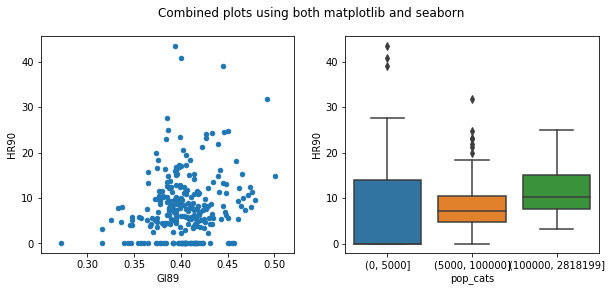

In [35]:
## Created Visualization

f, axs = plt.subplots(1, 2, figsize=(10, 4))

db[['GI89', 'HR90']].plot.scatter('GI89', 'HR90', ax = axs[0])
# Second axis
seaborn.boxplot(x="pop_cats",
                y="HR90",
                data=db, ax=axs[1])

f.suptitle("Combined plots using both matplotlib and seaborn")
plt.savefig('figure.pdf', dpi=300)

## Response to "GeoPandas" Tutorial

### How is data stored in R versus pandas/Python?
*In R, data is typically stored in a data.frame structure which is a list of vector variables, where the vectors all have the same length. In pandas, data is similarly stored where data is stored within DataFrames where the DataFrame is a series of one dimensional numpy arrays.*

### How is spatial data stored in sf/R versus geopandas/Python?
*In sf, spatial data is stored in a dataframe structure with a single row for each feature. Similarly, with geopandas, the DataFrame structure set forth by pandas is extended to contain spatial data by supporting the geom type.*

### Identify 3 more differences you uncovered in syntax logic or computational processing. Consider: filtering/subsetting data, aggregations, group by, merges, etc.
* Difference in accessing particular columns. When using R, we able to access a column using the following methods: table\[column\] or table$column, in pandas we would do the same as follows: table[column] or table.column
* In pandas it is common for the following format: df.funct() while in R, funct(df) more common. (Ex: Differences in filtering: In pandas, df.loc[df['col'] == val] or df.filter(cond) while in R, filter(df, cond))
* In R, to group typically have to use the following df \%>\% group_by(col) \%>\% funct(), while pandas group by can be done in the following way: df.groupby(col).funct()

## Trouble Shooting Log:
*When completing this lab, I ran into minimal issues. The main issues arose from my computer now having certain packages installed such as pandas. To install this using Anaconda, I used the following code in terminal: conda install pandas.*